# taq_trade_sign_self_correlator_year_avg_plot

#### Juan Camilo Henao Londono - 12.03.2019
#### AG Guhr - Universitaet Duisburg-Essen

In the following [link]() can be seen the plot of the function's results

In [1]:
# Modules

import numpy as np
from matplotlib import pyplot as plt
import os

import pickle

import taq_data_tools

__tau__ = 1000

In [6]:
def taq_trade_sign_self_correlator_year_avg_plot(ticker, year, months, days):
    """
    Plot the average trade sign self correlator during a year and the dayly self response
    contributions in a figure. The data is loaded from the trade sign self correlator data
    results.
        :param ticker: string of the abbreviation of the midpoint stock to
         be analized (i.e. 'AAPL')
        :param year: string of the year to be analized (i.e '2008')
        :param month: List of strings of the months to be analized
         (i.e ['07', '08', '09'])
        :param days: List of lists of strings with the days to be analized
         (i.e [['07', '08', '09'], ['01', '02']])
    """

    figure = plt.figure(figsize=(16, 9))

    plot_data_year = np.zeros(__tau__)

    for month in months:

        plot_data_month = np.zeros(__tau__)

        for i, day in enumerate(days[int(month) - 1]):

            function_name = taq_trade_sign_self_correlator_year_avg_plot.__name__
            taq_data_tools.taq_function_header_print_plot(function_name,
                                                          ticker, ticker,
                                                          year, month, day)

            load_day = pickle.load(open(''.join((
                '../taq_data_{1}/taq_trade_sign_self_correlator_data/'
                + 'taq_trade_sign_self_correlator_data_{1}{2}{3}_{0}'
                + '.pickle').split())
                .format(ticker, year, month, day), 'rb'))

            plot_data_month += load_day

            plt.loglog(load_day, '-', alpha=0.1)

        plot_data_month = plot_data_month / len(days[int(month) - 1])

        plt.loglog(plot_data_month, '-', alpha=0.5,
                     label='Stock i {} - Month {}'
                     .format(ticker, month))

        plot_data_year += plot_data_month

    plot_data_year = plot_data_year / len(months)
    plt.loglog(plot_data_year, '-', linewidth=5,
                 label='Stock {} - Year {}'
                 .format(ticker, year))

    plt.ylim([10E-6, 10])
    plt.xlabel(r'Time lag $[\tau]$')
    plt.ylabel(r'Trade sign self-correlator $ \Theta_{ij} (\tau) $')
    plt.legend(loc='best')
    plt.title('Trade sign self-correlator - ticker {} - {}.{}-{}'
              .format(ticker, month, days[0], days[-1]))
    plt.grid(True)
    plt.tight_layout()

    # Plotting
    taq_data_tools.taq_save_plot(function_name, figure, ticker, ticker, year,
                                 month)

    return None

TAQ data
taq_trade_sign_self_correlator_week_avg_plot
Processing plot for the stock AAPL the 2008.03.10
TAQ data
taq_trade_sign_self_correlator_week_avg_plot
Processing plot for the stock AAPL the 2008.03.11
TAQ data
taq_trade_sign_self_correlator_week_avg_plot
Processing plot for the stock AAPL the 2008.03.12
TAQ data
taq_trade_sign_self_correlator_week_avg_plot
Processing plot for the stock AAPL the 2008.03.13
TAQ data
taq_trade_sign_self_correlator_week_avg_plot
Processing plot for the stock AAPL the 2008.03.14
Plot saved



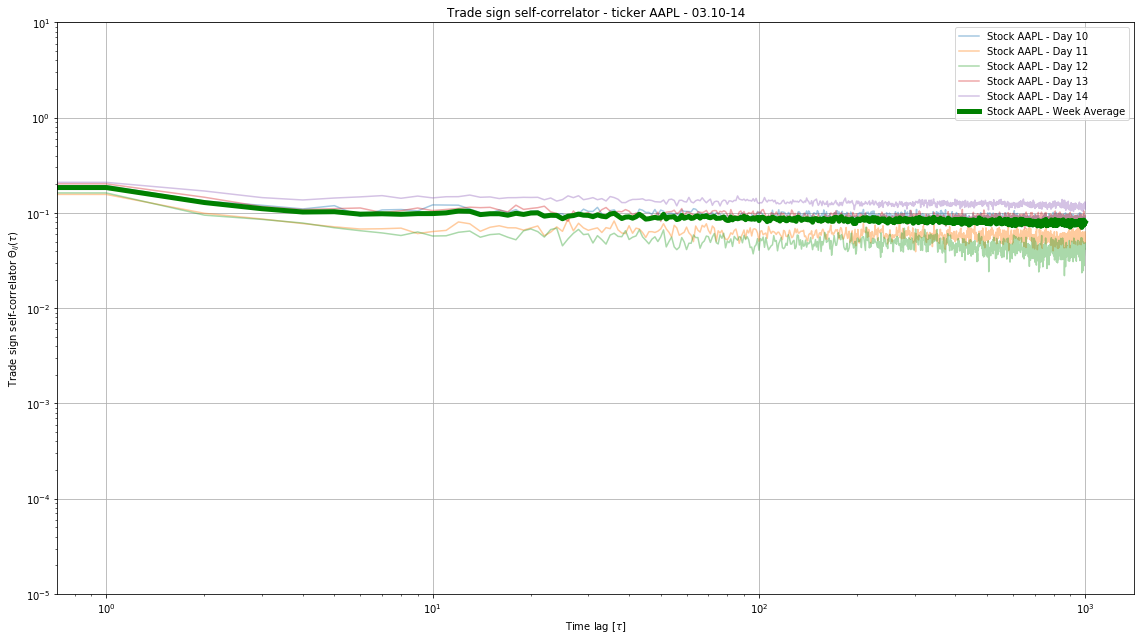

In [7]:
# Test

ticker = 'AAPL'
year = '2008'
month = '03'
days = ['10', '11', '12', '13', '14']

taq_trade_sign_self_correlator_week_avg_plot(ticker, year, month, days)